In [2]:
import pandas as pd
import numpy as np
import os
from scipy import stats
%pylab inline
os.chdir("D:\Python")

Populating the interactive namespace from numpy and matplotlib


In [3]:
ls

 El volumen de la unidad D es Datos
 El n£mero de serie del volumen es: B012-2E11

 Directorio de D:\Python

27/01/2017  10:41 a. m.    <DIR>          .
27/01/2017  10:41 a. m.    <DIR>          ..
25/01/2017  12:06 p. m.             3,192 .RData
26/01/2017  04:25 p. m.             1,674 .Rhistory
23/12/2016  01:15 p. m.               975 Comando python.txt
15/01/2017  12:48 p. m.    <DIR>          Completar datos con redes neurales
17/12/2016  02:19 p. m.           621,816 Datos_Estacion_Batan_Zana.csv
25/01/2017  11:46 a. m.             1,025 Datos_Estacion_Batan_Zana_2.csv
27/01/2017  02:51 a. m.               178 ejemplo.txt
27/01/2017  02:47 a. m.               178 ejercicio_expo.csv
27/01/2017  10:41 a. m.           123,194 Libro1.csv
06/07/2016  01:27 a. m.       376,455,657 NDVI_PIURA.tif
27/01/2017  02:50 a. m.                 0 Nuevo documento de texto.txt
29/12/2016  11:39 a. m.    <DIR>          Shape
17/12/2016  02:19 p. m.           881,960 Untitled.ipynb
              11

In [4]:
ejemplo = pd.read_csv('ejemplo.txt', index_col=0 ,parse_dates=True)
ejemplo.head()

,P(mm)
Fecha,
1964-01-01,21.4
1965-01-01,19.4
1966-01-01,30.7
1967-01-01,23.2
1968-01-01,26.1


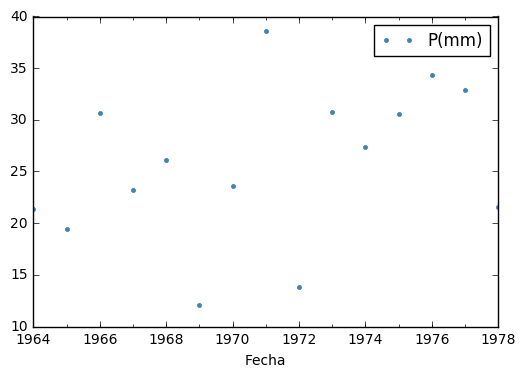

In [5]:
ejemplo.plot(style='.',color='#3F83B7')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000045F8630>]], dtype=object)

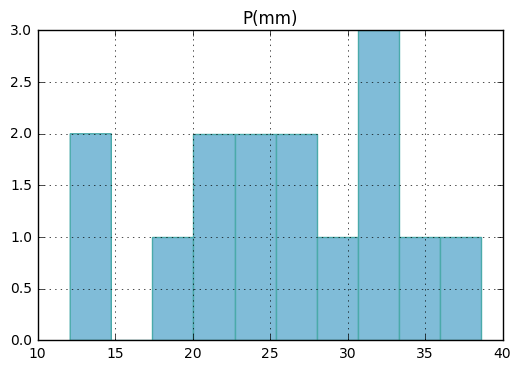

In [6]:
ejemplo.hist(edgecolor='#4aaaaa', color='#80BCD8')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C44F9B0>]], dtype=object)

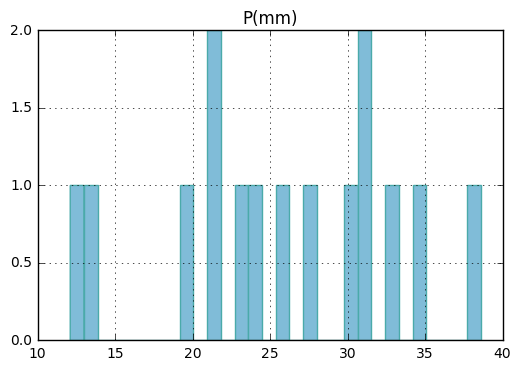

In [25]:
ejemplo[ejemplo>0].hist(bins=30, edgecolor='#4aaaaa', color='#80BCD8')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C433BA8>]], dtype=object)

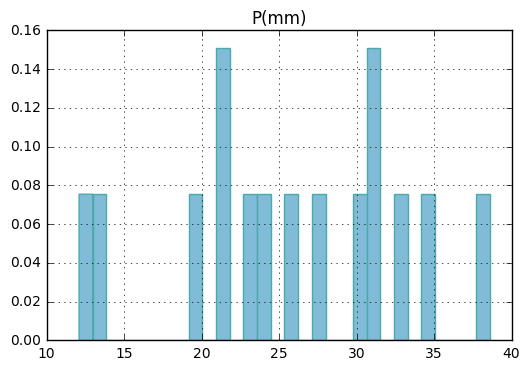

In [26]:
ejemplo[ejemplo>0].hist(bins=30, normed=True, edgecolor='#4aaaaa', color='#80BCD8')

In [28]:
promedio = ejemplo[ejemplo>0].mean()
desviacion = ejemplo[ejemplo>0].std()
print promedio, desviacion

P(mm)    25.766667
dtype: float64 P(mm)    7.475834
dtype: float64


In [29]:
#determinamos las regresiones estadisticas
tabulaciones = np.arange(-40,51,0.1)
distnormal = stats.norm.pdf(tabulaciones, 
                            loc=promedio, scale=desviacion)
distlognormal = stats.pearson3.pdf(tabulaciones,skew=1,
                                   loc=promedio, scale=desviacion)
distweibull = stats.dweibull.pdf(tabulaciones,c=1,
                                   loc=promedio, scale=desviacion)
distchi2 = stats.chi2.pdf(tabulaciones,df=2,
                                   loc=promedio, scale=desviacion)

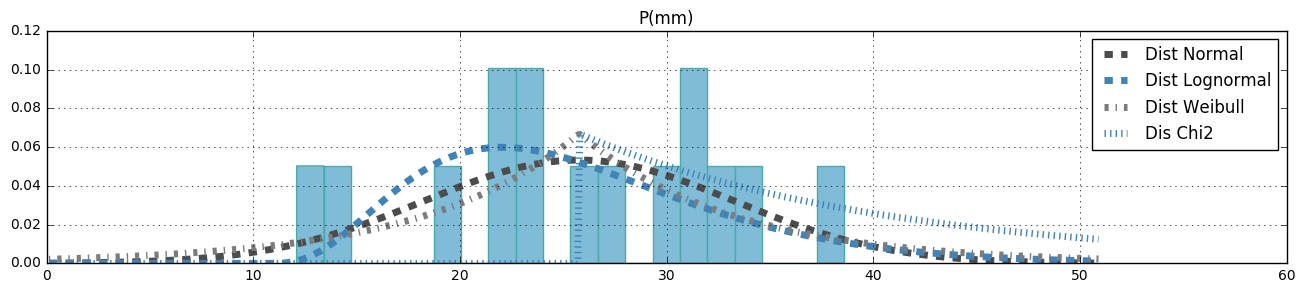

In [40]:
ejemplo[ejemplo>0].hist(bins=20, normed=True, edgecolor='#4aaaaa', color='#80BCD8')
plot(tabulaciones,distnormal, color='#4B4C4E', linewidth=5, linestyle='--',label='Dist Normal')
plot(tabulaciones,distlognormal, color='#3F83B7', linewidth=5, linestyle='--', label='Dist Lognormal')
plot(tabulaciones,distweibull, color='#7B7C7E', linewidth=5, linestyle='-.', label='Dist Weibull')
plot(tabulaciones,distchi2, color='#3F83B7', linewidth=5, linestyle=':', label='Dis Chi2')
xlim(0,60)
legend(loc='upper right')
figsize(16,9)

In [41]:
p10y_norm = stats.norm.ppf([0.9], loc=promedio, scale=desviacion)
p10y_lognorm = stats.pearson3.ppf([0.9], skew=1, loc=promedio, scale=desviacion)
p10y_weibull = stats.dweibull.ppf([0.9], c=1, loc=promedio, scale=desviacion)
p10y_chi2 = stats.chi2.ppf([0.9], df=2, loc=promedio, scale=desviacion)

print "Precipitación para T=10años Dist Normal =", p100y_norm[0]
print "Precipitación para T=10años Dist Logormal =", p100y_lognorm[0]
print "Precipitación para T=10años Dist Weibull =", p100y_weibull[0]
print "Precipitación para T=10años Dist Chi2 =", p100y_chi2[0]

Precipitación para T=10años Dist Normal = 35.3473335396
Precipitación para T=10años Dist Logormal = 35.7872113822
Precipitación para T=10años Dist Weibull = 37.7985574671
Precipitación para T=10años Dist Chi2 = 60.1941549016
